In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/imigrantes_canada.csv')

In [3]:
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [4]:
# Como definir a coluna pais como um indice?
df.set_index('País',inplace=True)

In [5]:
import seaborn as sns

In [7]:
# os top 10 paises com imigrantes para o Canada
top_10 = df.sort_values(by='Total', ascending=False).head(10)
top_10

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Índia,Ásia,Sul da Ásia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Ásia,Ásia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido e Irlanda do Norte,Europa,Norte da Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Ásia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Paquistão,Ásia,Sul da Ásia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos da América,América do Norte,América do Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irã,Ásia,Sul da Ásia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Ásia,Sul da Ásia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
República da Coreia,Ásia,Ásia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


# Gráfico com Seaborn

In [8]:
import matplotlib.pyplot as plt

In [9]:
sns.set_theme()

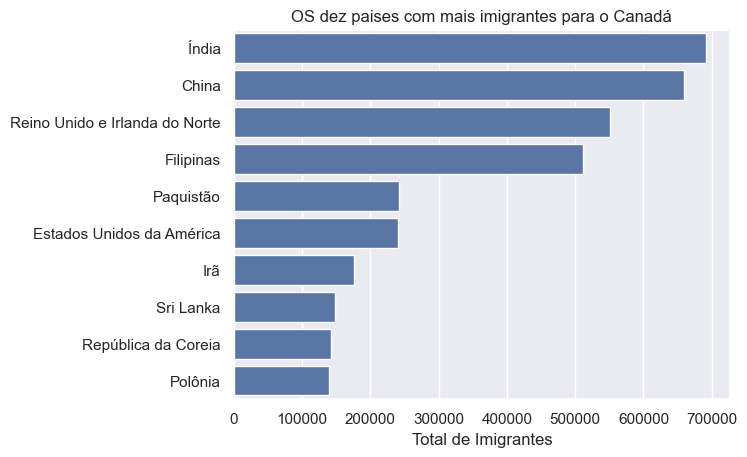

In [10]:
# Temas do Seaborn
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')
ax.set(
    title='OS dez paises com mais imigrantes para o Canadá',
    xlabel= "Total de Imigrantes",
    ylabel=''
)
plt.show()

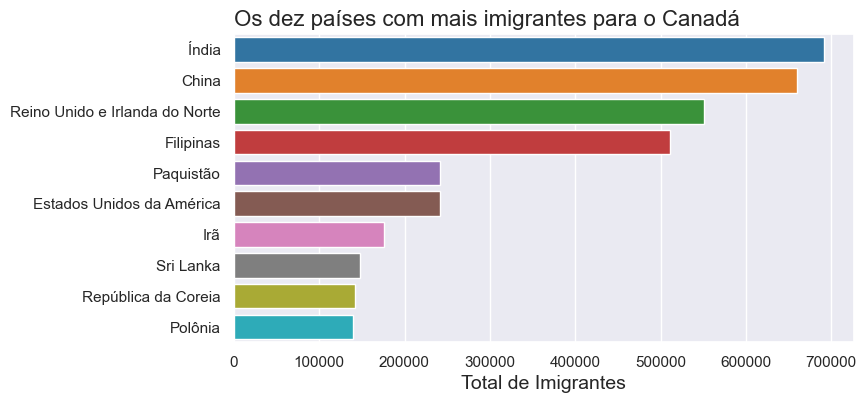

In [13]:
# usar palheta de cores e deixar cada pais colorido, tema = tab10
def gerar_grafico_paleta(pallete):
    fig, ax = plt.subplots(figsize=(8, 4))
    # Ajuste conforme o aviso
    ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=pallete, hue=top_10.index, legend=False)
    ax.set_title('Os dez países com mais imigrantes para o Canadá', loc='left', fontsize=16)
    ax.set_xlabel("Total de Imigrantes", fontsize=14)
    ax.set_ylabel('')
    plt.show()

gerar_grafico_paleta('tab10')

# Gráficos interativos com Potly

In [14]:
import plotly.express as px

In [17]:
anos = list(map(str,range(1980,2014)))

In [18]:
brasil = df.loc['Brasil',anos]

In [19]:
brasil_dict = {'ano':brasil.index.tolist(),'imigrantes':brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [20]:
dados_brasil.head()

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


In [21]:
fig = px.line(dados_brasil,
              x='ano',
              y='imigrantes',
              title='Imigrantes do Brasil para o Canadá \n de 1980 a 2013')
#fig.update_layout(width=1000,height=500)
fig.update_xaxes(tickangle=45)
fig.show()

In [22]:
fig = px.line(dados_brasil,
              x='ano',
              y='imigrantes',
              title='Imigrantes do Brasil para o Canadá \n de 1980 a 2013')
fig.update_layout(width=1050,
                  height=600,
                  font_family='Arial',
                  font_color='grey',
                  title_font_color='black',
                  title_font_size=22,
                  xaxis_title='Ano',
                  yaxis_title='Número de imigrantes')
fig.update_traces(line_color='red', line_width=3)
fig.update_xaxes(tickangle=0)
fig.update_xaxes(nticks=14)
fig.show()

In [24]:
# Salvando Gráficos em um arquivo html
fig.write_html('templates/imigrantes_brasil.html')